# Sign Language Recogntion

In [3]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import cv2
from tqdm import tqdm
import random
import json

## Load the dataset

In [4]:
# open and get the constants from the json file
f = open('Constants.json')
data = json.load(f)

labels = data['labels']

# number of classes
NUM_CLASSES = data['NUM_CLASSES']

# number of samples per class
SAMPLES_PER_CLASS = data['SAMPLES_PER_CLASS']

# size of the images to be used by our model
IMG_SIZE = data['TRAIN_IMG_SIZE']

In [5]:
def loadData(DIR):
    X = []
    Y = []
    for i in range(NUM_CLASSES):
        path = os.path.join(DIR, str(labels[str(i)]))
        for img in tqdm(os.listdir(path)):
            arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
            X.append(resized_arr)
            Y.append(i)
    return (np.array(X), np.array(Y))

In [6]:
DIR = "C:\\Users\\Admin\\Desktop\\SLR\\Sign Language Recognition"
(X, Y) = loadData(DIR)

100%|██████████| 150/150 [00:01<00:00, 119.82it/s]


## Data Visualiztion

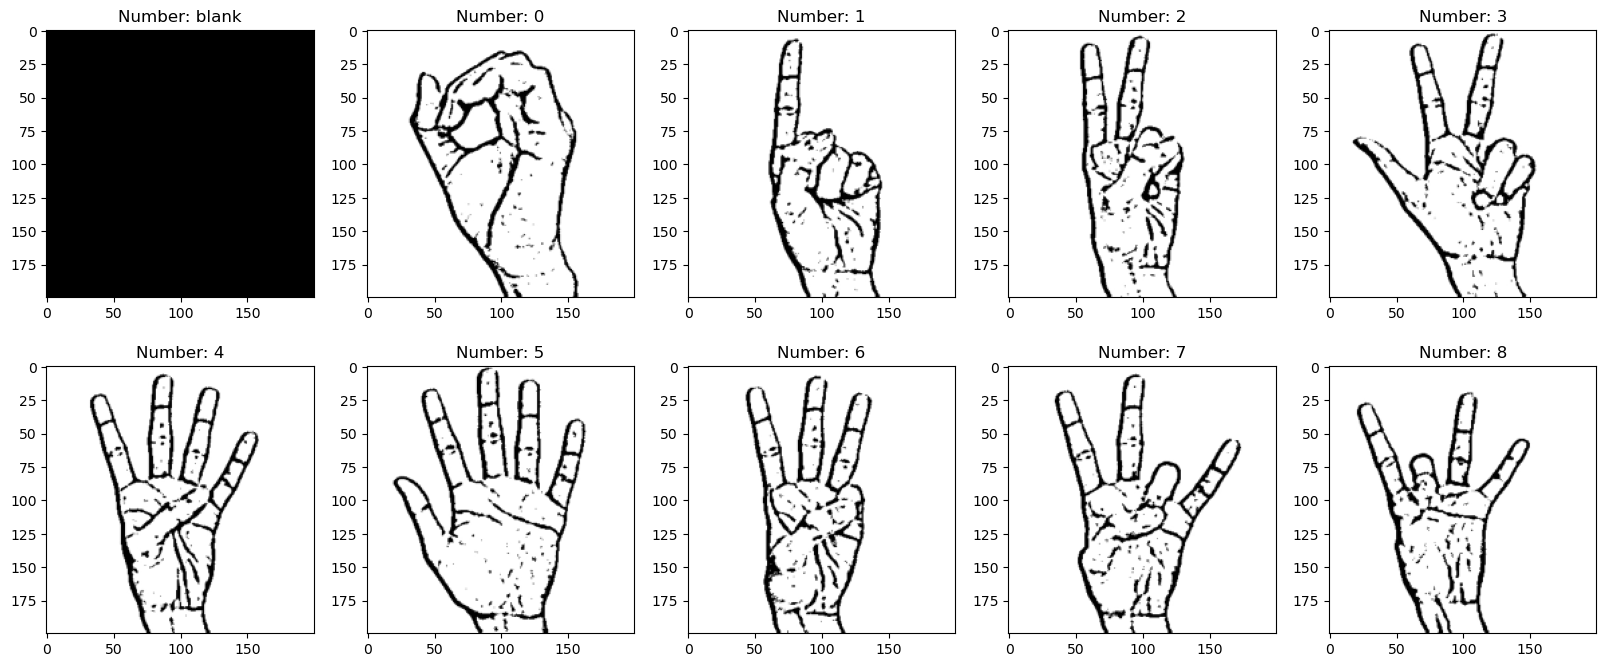

In [7]:
# 1 image of each of the numbers
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(20, 8)
l = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[l], 'gray')
        ax[i, j].set_title('Number: ' + labels[str(Y[l])])
        l = l + SAMPLES_PER_CLASS

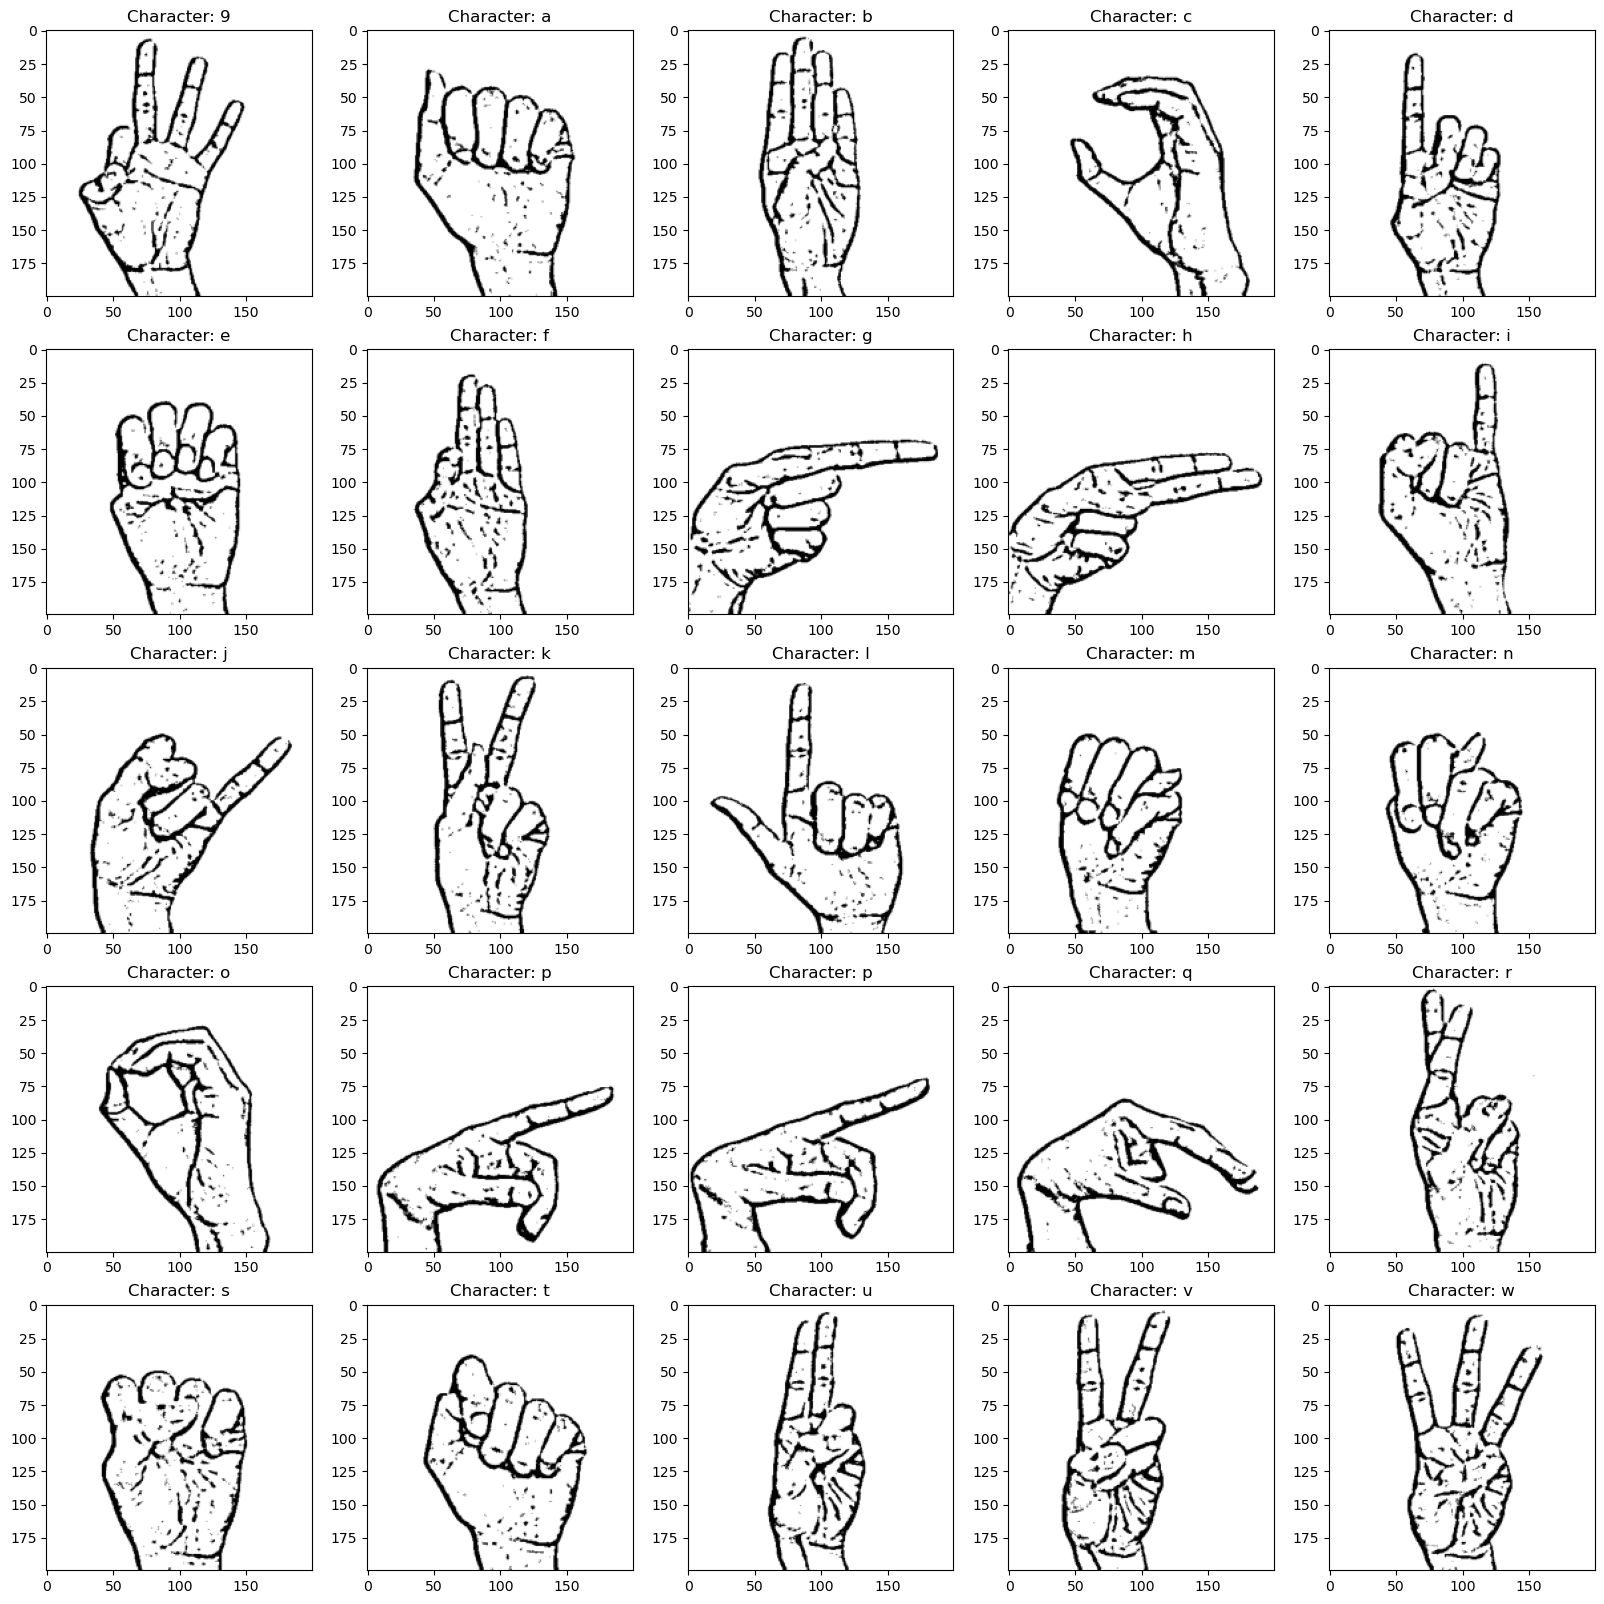

In [8]:
# 1 image of each of the characters
fig, ax = plt.subplots(5, 5)
fig.set_size_inches(20, 20)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(X[l], 'gray')
        ax[i, j].set_title('Character: ' + labels[str(Y[l])])
        l = l + SAMPLES_PER_CLASS

## Preprocessing of data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
# normalize the data
X = X / 255

# reshape the data
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = Y.reshape(-1, 1)
Y = keras.utils.to_categorical(Y, NUM_CLASSES)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(4163, 200, 200, 1)
Y_train shape:(4163, 37)
X_test shape:(1388, 200, 200, 1)
Y_test shape:(1388, 37)


## CNN Model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from keras.layers import Dense

In [13]:
model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 1)),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation = 'softmax')
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, epochs = 6, validation_split = 0.7)

Epoch 1/6
39/39 [==============================] - 624s 16s/step - loss: 2.8914 - accuracy: 0.2268 - val_loss: 0.9506 - val_accuracy: 0.6926
Epoch 2/6
39/39 [==============================] - 682s 18s/step - loss: 0.7010 - accuracy: 0.7981 - val_loss: 0.2656 - val_accuracy: 0.9214
Epoch 3/6
39/39 [==============================] - 601s 16s/step - loss: 0.2404 - accuracy: 0.9295 - val_loss: 0.0678 - val_accuracy: 0.9756
Epoch 4/6
39/39 [==============================] - 605s 16s/step - loss: 0.1153 - accuracy: 0.9655 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 5/6
39/39 [==============================] - 585s 15s/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0218 - val_accuracy: 0.9935
Epoch 6/6
39/39 [==============================] - 627s 16s/step - loss: 0.0460 - accuracy: 0.9816 - val_loss: 0.0333 - val_accuracy: 0.9894


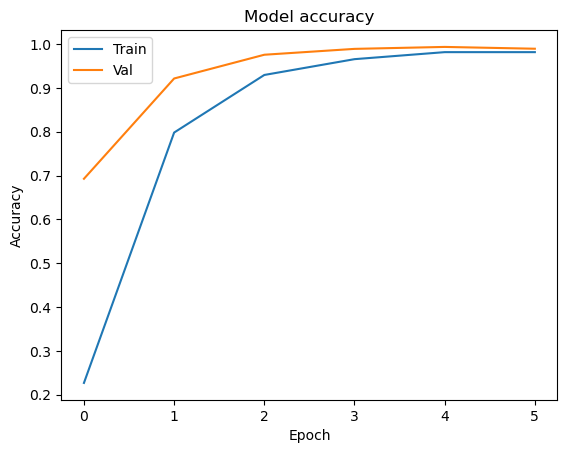

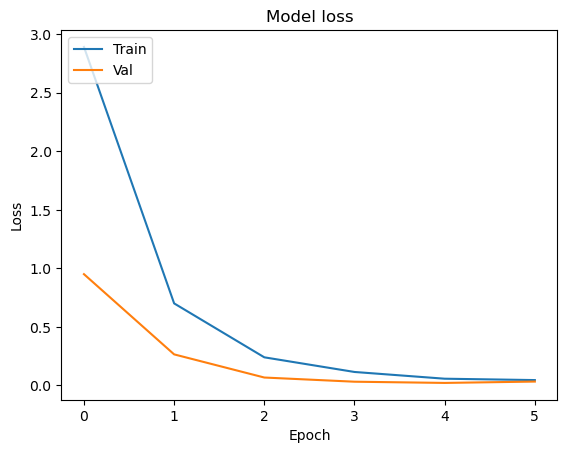

In [19]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [20]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

44/44 [==============================] - 120s 3s/step - loss: 0.0212 - accuracy: 0.9914
Accuracy on train set is 99.207300%
Accuracy on test set is 99.135447%


## Saving our model

In [21]:
# Save our model locally
keras_file = "sign_lang.h5"
model.save(keras_file)